In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train['Sex_clean'] = train['Sex'].astype('category').cat.codes 
test['Sex_clean'] = test['Sex'].astype('category').cat.codes

In [5]:
train['Embarked'].isnull().sum()


2

In [6]:
test['Embarked'].isnull().sum()

0

In [7]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train['Embarked'].fillna('S', inplace=True)

train['Embarked_clean'] = train['Embarked'].astype('category').cat.codes 
test['Embarked_clean'] = test['Embarked'].astype('category').cat.codes 

In [9]:
train['Family'] = 1 + train['SibSp'] + train['Parch']
test['Family'] = 1 + test['SibSp'] + test['Parch']

In [10]:
train['Solo'] = (train['Family'] == 1)
test['Solo'] = (test['Family'] == 1)

In [11]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

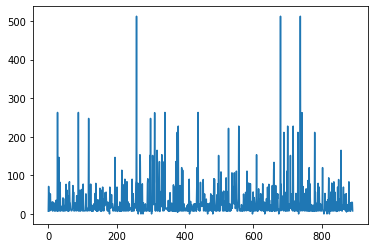

In [17]:
plt.plot(train['Fare'])
plt.show()

In [18]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
train['FareBin'] = pd.qcut(train['Fare'],5)
test['FareBin'] = pd.qcut(test['Fare'],5)

train['FareBin'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: FareBin, dtype: int64

In [20]:
train['Fare_clean'] = train['FareBin'].astype('category').cat.codes
test['Fare_clean'] = test['FareBin'].astype('category').cat.codes

train['Fare_clean'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare_clean, dtype: int64

In [29]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [30]:
train['Title'] = train['Title'].replace(['Dr','Rev','Mlle','Major','Col', 'Countess', 'Capt', 'Ms','Sir', 'Lady','Mme','Don','Jonkheer'], 'Other')
train['Title'] = train['Title'].replace('Mlle','Miss')
train['Title'] = train['Title'].replace('Ms','Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')

train['Title'].value_counts()



Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [31]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [34]:
test['Title'] = test['Title'].replace(['Dr','Rev','Col','Dona'], 'Other')
test['Title'] = test['Title'].replace('Ms','Miss')

test['Title'].value_counts()


Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

In [35]:
train['Title_clean'] = train['Title'].astype('category').cat.codes
test['Title_clean'] = test['Title'].astype('category').cat.codes

In [36]:
train['Age'].isnull().sum()

177

In [37]:
test['Age'].isnull().sum()

86

In [38]:
import seaborn as sns

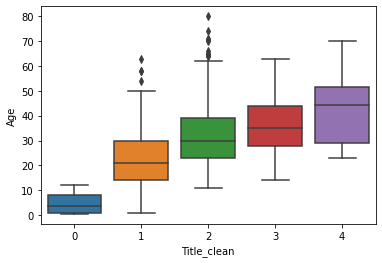

In [43]:
sns.boxplot(x=train['Title_clean'],y=train['Age'])
plt.show()

In [44]:
train['Age'].fillna(train.groupby("Title")['Age'].transform("median"), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

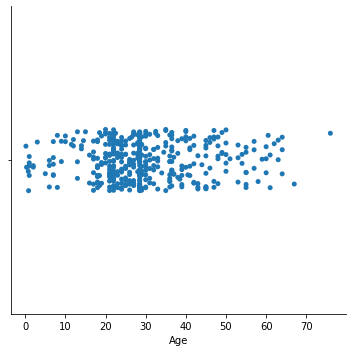

In [47]:
sns.catplot('Age', data=test)
plt.show()

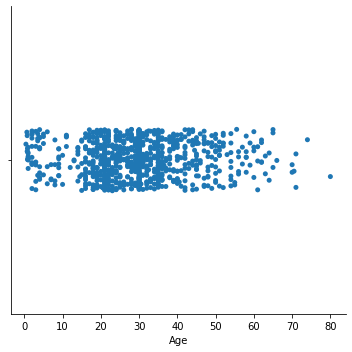

In [52]:
sns.catplot('Age',data=train)
plt.show()

In [61]:
pd.cut(train['Age'],10).value_counts()



(24.294, 32.252]    288
(16.336, 24.294]    213
(32.252, 40.21]     135
(40.21, 48.168]      71
(0.34, 8.378]        58
(8.378, 16.336]      46
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age, dtype: int64

In [62]:
def binning_age(x):
    if x <= 8:
        return 0
    elif 8< x <= 12:
        return 1
    elif 12 < x <= 16:
        return 2
    elif 16<= x <20:
        return 3
    elif 20 <= x < 24:
        return 4
    elif 24<= x < 28:
        return 5
    elif 28<= x <32:
        return 6
    elif 32<= x <40:
        return 7
    elif 40<= x < 44:
        return 8
    elif 44<= x < 48:
        return 9
    elif 48 <= x < 52:
        return 10
    elif 52<= x <60:
        return 11
    elif 60<= x <64:
        return 12
    else:
        return 13
    


In [67]:
train['Age_clean'] = train['Age'].apply(binning_age)

In [70]:
test['Age_clean'] = test['Age'].apply(binning_age)

In [71]:
train['Cabin'].str[:1].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [72]:
mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7
}

train['Cabin_clean'] = train['Cabin'].str[:1]
train['Cabin_clean'] = train['Cabin_clean'].map(mapping)


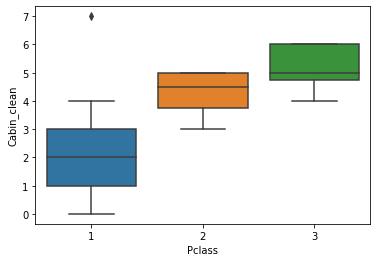

In [76]:
sns.boxplot(x = 'Pclass', y='Cabin_clean', data=train)
plt.show()

In [116]:
test['Cabin_clean'] = test['Cabin'].str[:1]
test['Cabin_clean'] = test['Cabin_clean'].map(mapping)

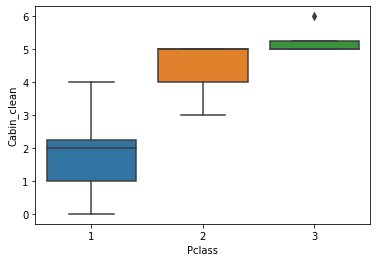

In [117]:
sns.boxplot(x = 'Pclass', y='Cabin_clean', data=test)
plt.show()

In [118]:
test['Cabin_clean'].mean()

2.2967032967032965

In [120]:
train['Cabin_clean'] = train.groupby('Pclass')['Cabin_clean'].transform('median')

train['Cabin_clean'].value_counts()

5.083333    491
2.039773    216
4.250000    184
Name: Cabin_clean, dtype: int64

In [121]:
test['Cabin_clean'] = test.groupby('Pclass')['Cabin_clean'].transform('median')

test['Cabin_clean'].value_counts()

5.0    311
2.0    107
Name: Cabin_clean, dtype: int64

In [80]:
feature = [
    'Pclass',
    'SibSp',
    'Parch',
    'Sex_clean',
    'Embarked_clean',
    'Family',
    'Solo',
    'Title_clean',
    'Age_clean',
    'Cabin_clean',
    'Fare_clean',
]

label = [
    'Survived',
]

In [81]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier


0.8249188514357053

In [122]:

data = train[feature]
target = train[label]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
cross_val_score(clf, data, target, cv=k_fold, scoring='accuracy',).mean()

0.8249188514357053

In [112]:
data = train[feature]
target = train[label]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
cross_val_score(clf, data, target, cv=k_fold, scoring='accuracy',).mean()

0.8327590511860175

In [123]:
x_train = train[feature]
x_test = test[feature]
y_train = train[label]

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
clf.fit(x_train, y_train)

rf_1 = pd.DataFrame(test['PassengerId'])
rf_1['Survived'] = clf.predict(x_test)
rf_1.to_csv('submission_2.csv', index=False)

In [114]:
x_train = train[feature]
x_test = test[feature]
y_train = train[label]

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf.fit(x_train, y_train)

rf_1 = pd.DataFrame(test['PassengerId'])
rf_1['Survived'] = clf.predict(x_test)
rf_1.to_csv('submission_5.csv', index=False)

↑ 정확도가 좀 더 높은 샘플수와 깊이 제한을 두고 채점해봤지만 더 낮은 점수를 받았다.

In [103]:
from sklearn.linear_model import LinearRegression

x_train = train[feature]
x_test = test[feature]
y_train = train[label]

lm = LinearRegression(fit_intercept=True, normalize=True, n_jobs=0)
lm_1 = pd.DataFrame(test['PassengerId'])
lm.fit(x_train,y_train)
lm.score(x_train,y_train)


0.40735469654369594

In [ ]:
lm_1['Survived']= lm.predict(x_test)
lm_1.loc[lm_1['Survived']<0.5, 'Survived'] = 0
lm_1.loc[lm_1['Survived']>=0.5, 'Survived'] = 1


In [97]:
lm_1 = lm_1.astype({'Survived':'int'})

In [98]:
lm_1.dtypes

PassengerId    int64
Survived       int32
dtype: object

In [99]:
lm_1.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [100]:

lm_1.to_csv('submission_3.csv', index=False)



In [101]:
from sklearn.neighbors import KNeighborsClassifier

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
knn_1 = pd.DataFrame(test['PassengerId'])
knn_1['Survived'] = clf.predict(x_test)

knn_1.head(5)




,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [102]:
knn_1.to_csv('submission_4.csv',index=False)